<a href="https://colab.research.google.com/github/tobinw23/2023-baseball-project/blob/main/Marcus_Stroman_2023_Sinker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install pybaseball

In [12]:
import pandas as pd
import numpy as np
import pybaseball as pyb
import matplotlib.pyplot as plt
import string
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

In [13]:
from pybaseball import statcast_pitcher
from pybaseball import  playerid_lookup
from pybaseball import pitching_stats
pd.set_option('display.max_columns', None)
data = pitching_stats(2023)
data.head()

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB% 2,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA,botERA,botOvr CH,botStf CH,botCmd CH,botOvr CU,botStf CU,botCmd CU,botOvr FA,botStf FA,botCmd FA,botOvr SI,botStf SI,botCmd SI,botOvr SL,botStf SL,botCmd SL,botOvr KC,botStf KC,botCmd KC,botOvr FC,botStf FC,botCmd FC,botOvr FS,botStf FS,botCmd FS,botOvr,botStf,botCmd,botxRV100,Stf+ CH,Loc+ CH,Pit+ CH,Stf+ CU,Loc+ CU,Pit+ CU,Stf+ FA,Loc+ FA,Pit+ FA,Stf+ SI,Loc+ SI,Pit+ SI,Stf+ SL,Loc+ SL,Pit+ SL,Stf+ KC,Loc+ KC,Pit+ KC,Stf+ FC,Loc+ FC,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
19,10310,2023,Zack Wheeler,PHI,33,13,6,5.9,3.61,32,32,0,0,0,0,192.0,787,168,82,77,20,39,0,9,1,0,212,216,202,106,29,1089,2069,3158,119,10,3,2,9.94,1.83,5.44,7.88,0.94,0.227,1.08,0.292,0.713,3.15,1.07,0.202,0.412,0.385,0.144,0.099,0.046,0.667,55.6,192.0,NaN,NaN,55.6,$47.6,3.20,3.54,1.94,-11.44,13.37,19.25,1.96,0.92,0.93,0.87,1.05,32,3.07,-0.96,0.617,95.6,0.128,84.6,0.138,91.0,0.114,81.4,NaN,NaN,0.003,90.7,NaN,NaN,0.001,NaN,30.2,0.3,-1.7,-6.0,NaN,-0.8,NaN,1.55,0.08,-0.39,-1.67,NaN,-8.26,NaN,0.366,0.710,0.511,0.619,0.826,0.740,0.421,0.616,0.133,0,0,0,82,70,81,0.269,0.050,3.53,5.58,0.46,0.433,NaN,NaN,NaN,NaN,0.182,0.267,0.115,NaN,NaN,0.004,NaN,NaN,NaN,95.8,NaN,NaN,NaN,NaN,95.2,87.9,81.4,NaN,NaN,91.1,NaN,NaN,-4.2,NaN,NaN,NaN,NaN,-9.4,3.6,5.1,NaN,NaN,-8.9,NaN,NaN,8.8,NaN,NaN,NaN,NaN,4.9,2.5,-5.7,NaN,NaN,6.5,NaN,NaN,23.0,NaN,NaN,NaN,NaN,9.4,-1.4,-5.8,NaN,NaN,-0.8,NaN,NaN,1.68,NaN,NaN,NaN,NaN,1.64,-0.17,-1.61,NaN,NaN,-5.90,NaN,NaN,0.328,0.679,0.512,0.527,0

In [10]:
data1 = pyb.statcast(start_dt='2023-03-30',end_dt='2023-06-30')
data2 = pyb.statcast(start_dt='2023-07-01',end_dt='2023-10-01')
data1.head(2)

This is a large query, it may take a moment to complete


/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
100%|██████████| 93/93 [02:54<00:00,  1.88s/it]


This is a large query, it may take a moment to complete


/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
100%|██████████| 93/93 [02:42<00:00,  1.74s/it]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3139,FS,2023-06-30,90.8,-2.13,5.85,"Harvey, Hunter",669016,640451,strikeout,swinging_strike_blocked,<NA>,<NA>,<NA>,<NA>,13,Brandon Marsh strikes out swinging.,R,L,R,PHI,WSH,S,2,NaN,0,2,2023,-0.93,-0.03,-0.76,0.74,<NA>,<NA>,<NA>,2,9,Bot,<NA>,<NA>,<NA>,<NA>,660688,<NA>,<NA>,5.394886,-132.156047,-6.827231,-11.991177,26.821456,-31.348878,3.08,1.46,<NA>,<NA>,<NA>,90.9,1075,6.2,717563,640451,660688,642086,671277,600869,682928,656448,656537,657041,54.25,<NA>,<NA>,0.0,1,0,0,<NA>,72,3,Split-Finger,1,2,1,2,2,1,1,2,Standard,Standard,239,-0.044,-0.065
3258,FF,2023-06-30,97.6,-1.94,6.06,"Harvey, Hunter",669016,640451,NaN,called_strike,<NA>,<NA>,<NA>,<NA>,9,Brandon Marsh strikes out swinging.,R,L,R,PHI,WSH,S,<NA>,NaN,0,1,2023,-0.75,1.26,0.4,1.69,<NA>,<NA>,<NA>,2,9,Bot,<NA>,<NA>,<NA>,<NA>,660688,<NA>,<NA>,7.964936,-141.652804,-9.078071,-11.861276,32.146122,-13.343212,2.96,1.39,<NA>,<NA>,<NA>,97.2,2051,6.2,717563,640451,660688,642086,671277,600869,682928,656448,656537,657041,54.32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,72,2,4-Seam Fastball,1,2,1,2,2,1,1,2,Standard,Standard,212,0.0,-0.023


In [14]:
Stroman = data1.loc[data1['player_name'] == 'Stroman, Marcus']
Stroman1 = Stroman.loc[Stroman['pitch_type']=='SI']
Stroman1.head(2)
StromanA = data2.loc[data2['player_name'] == 'Stroman, Marcus']
Stroman2 =StromanA.loc[StromanA['pitch_type']=='SI']

In [15]:
min_plate_x = -0.83
max_plate_x = 0.83
min_plate_z = 1.17
max_plate_z = 3.92


strike_zone_width = max_plate_x - min_plate_x
strike_zone_height = max_plate_z - min_plate_z


strike_zone_center_x = (min_plate_x + max_plate_x) / 2
strike_zone_center_z = (min_plate_z + max_plate_z) / 2


print("Strike zone coordinates:")
print(f"  Bottom-left: ({min_plate_x}, {min_plate_z})")
print(f"  Top-right: ({max_plate_x}, {max_plate_z})")
print(f"  Center: ({strike_zone_center_x}, {strike_zone_center_z})")

Strike zone coordinates:
  Bottom-left: (-0.83, 1.17)
  Top-right: (0.83, 3.92)
  Center: (0.0, 2.545)


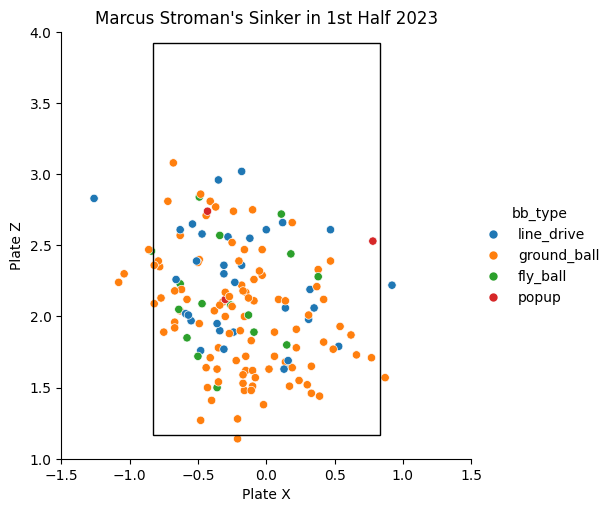

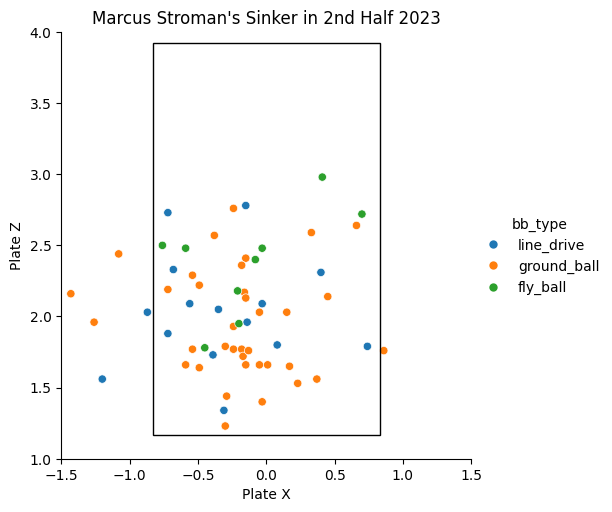

In [16]:
import matplotlib.patches as patches
import seaborn as sns
rect = patches.Rectangle(
    (-0.83, 1.17),
    1.66,
    2.75,
    linewidth=1,
    edgecolor='black',
    facecolor='none'
)


sns.relplot(
    data=Stroman1,
    x="plate_x",
    y="plate_z",
    hue="bb_type",
    aspect=1,
)

ax = plt.gca()

ax.add_patch(rect)



ax.set_xlim(-1.5, 1.5)
ax.set_ylim(1, 4)

ax.set_title("Marcus Stroman's Sinker in 1st Half 2023")
ax.set_xlabel("Plate X")
ax.set_ylabel("Plate Z")
plt.show()

rect = patches.Rectangle(
    (-0.83, 1.17),
    1.66,
    2.75,
    linewidth=1,
    edgecolor='black',
    facecolor='none'
)


sns.relplot(
    data=Stroman2,
    x="plate_x",
    y="plate_z",
    hue="bb_type",
    aspect=1,
)

ax = plt.gca()

ax.add_patch(rect)


ax.set_title("Marcus Stroman's Sinker in 2nd Half 2023")

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(1, 4)

ax.set_xlabel("Plate X")
ax.set_ylabel("Plate Z")
plt.show()
